# HW 8

**Upload two files** to Gradescope: 
* `HW8.py` (which will be autograded)
* `HW8.ipynb` (run all cells to make sure all plots are visible)
___

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Build a Max Heap
Write a function **`build_max_heap(arr)`** that takes an array (or list) of numbers and re-arranges the elements to satisfy the max heap property. For example,
```
nums = [4, 1, 3, 2, 16, 9, 10, 14, 8, 7]
build_max_heap(nums)
nums
```
returns `[16, 14, 10, 8, 7, 9, 3, 2, 4, 1]`.


In [4]:
def max_heapify(arr, i):
    
    l = (2*(i+1))-1
    r = (2*(i+1))

    if l <= len(arr)-1 and arr[l] > arr[i]:
        largest = l
    else:
        largest = i
    
    if r <= len(arr)-1 and arr[r] > arr[largest]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        max_heapify(arr, largest)

def build_max_heap(arr):
    heap_size = len(arr)
    for i in range((len(arr)//2)-1, -1, -1):
        max_heapify(arr, i)
    

In [214]:
nums = [4,1,3,2,16,9,10,14,8,7]
build_max_heap(nums)
nums

[16, 14, 10, 8, 7, 9, 3, 2, 4, 1]

### Plot a Heap
Write a function **`plot_heap(arr)`** that displays the heap corresponding to an array or list of numbers. Below is a sample result for a list of 12 numbers. You may assume that the maximum list size is 31 and that the numbers are positive integers less than 100. It is not necessary to exactly match the appearance of the example below.

*Hint:* You may use the `heap_node_xy_coord()` helper function defined below, which returns  $(x, y)$ coordinates for any heap node by index (starting with $0$). The nodes will be assigned a $y$-coordinate of $1, 2, \ldots$, starting with the lowest level of the heap. The $x$-coordinates for the nodes will be symmetrical about $x=0$ with gaps starting $1$ unit apart at the lowest level.

<img src="http://www.coloradomath.org/python/plot-heap.jpg" width="518" height="346" />

In [5]:
def heap_node_xy_coord(index, arrsize):
    '''Return heap (x,y) coordinates for an index of an array or list.
       Indices begin with 0. The y-coordinates begin with 1 at the lowest
       level of the heap. The x-coordinates are symmetric about x=0 with 
       gaps starting 1 unit apart at the lowest level.'''
    
    heap_height = math.ceil(math.log2(arrsize + 1))
    node_level = math.floor(math.log2(index + 1))
    ycoord = heap_height - node_level

    xgap = 2 ** ycoord
    max_nodes_level = 2 ** node_level
    nodes_above = max_nodes_level - 1
    xstart = - xgap * (max_nodes_level-1) / 2
    xcoord = xstart + xgap * (index - nodes_above)

    return xcoord, ycoord

In [6]:
def plot_heap(arr):
    plt.axis('off')
    xcoords = []
    ycoords = []
    for i in range(len(arr)):
        x,y = heap_node_xy_coord(i , len(arr))
        xcoords.append(x)
        ycoords.append(y)
    
    j=1  
    for i in range(len(arr)//2):
        plt.plot([xcoords[i], xcoords[j]], [ycoords[i],ycoords[j]], color = '#ADD8E6')
        try:
            plt.plot([xcoords[i], xcoords[j+1]], [ycoords[i],ycoords[j+1]], color = '#ADD8E6')
        except:
            break
        j+=2

    for i in range(len(xcoords)):
        plt.scatter(xcoords[i],ycoords[i], s = 750, zorder = 3)
        plt.text(xcoords[i], ycoords[i], str(arr[i]), size = 15, ha = 'center')

    plt.show()

    

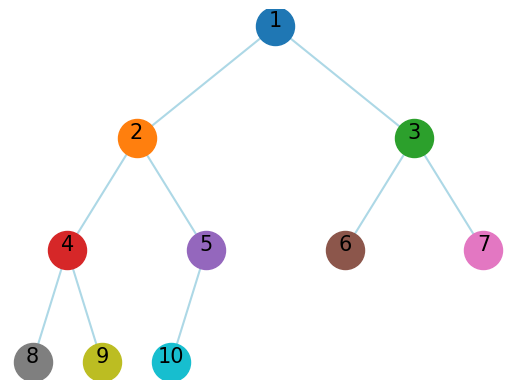

In [173]:
plot_heap([1,2,3,4,5,6,7,8,9,10])

### Visualize Building a Max Heap
Write a new version of **`build_max_heap(arr, viz=False)`** that will call `plot_heap()` to show intermediate results if `viz` is `True`. The function should display the heap after each element is moved to its final position. For the example from the textbook shown below, your function would display the initial configuration (a), then images (b) through (f). It is not necessary to add highlighting or to label the nodes with indices.

<img src="http://www.coloradomath.org/python/build-max-heap.jpg" width="544" height="626" />


Run `build_max_heap` on the following two lists.

In [7]:
def build_max_heap(arr, viz = False):
    if viz == True:
        for i in range((len(arr)//2), -1, -1):
            max_heapify(arr, i)
            plot_heap(arr)
    else:
        for i in range(math.floor(len(arr)/2), -1, -1):
            max_heapify(arr, i)
        

In [8]:
nums1 = [4, 1, 3, 2, 16, 9, 10, 14, 8, 7]

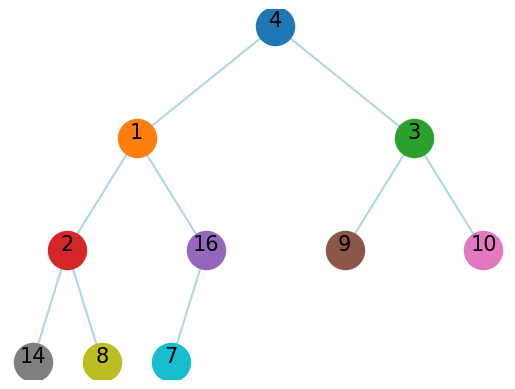

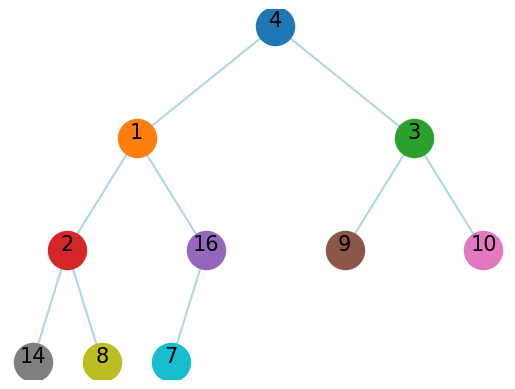

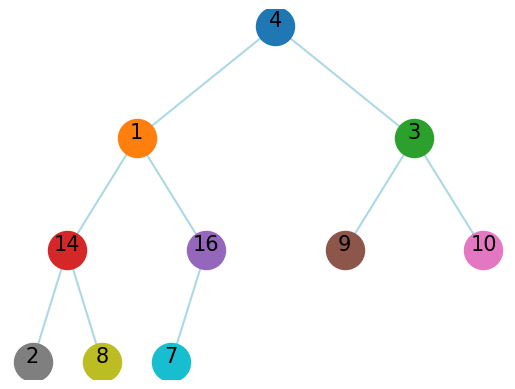

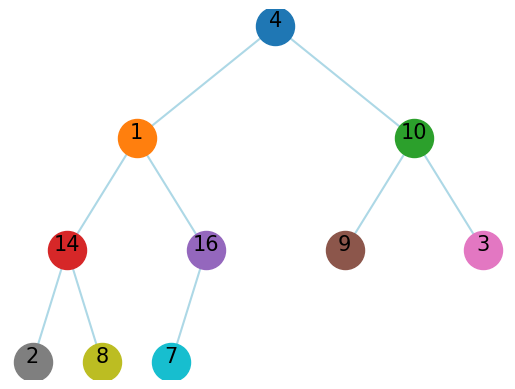

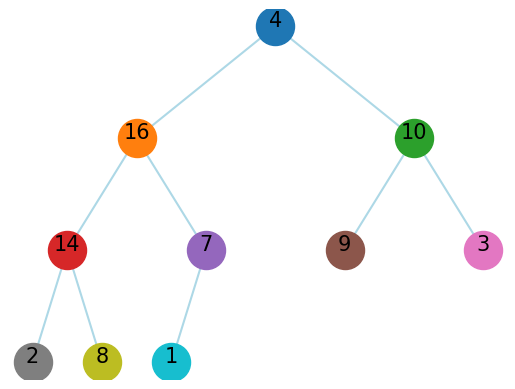

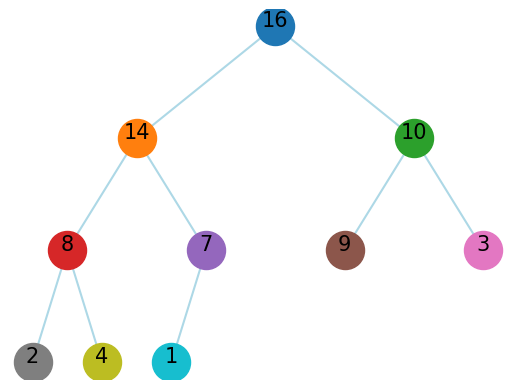

[16, 14, 10, 8, 7, 9, 3, 2, 4, 1]

In [11]:
build_max_heap(nums1, viz=True)
nums1

In [219]:
nums2 = [88, 52, 3, 67, 13, 5, 66, 92, 71, 18, 10, 26]

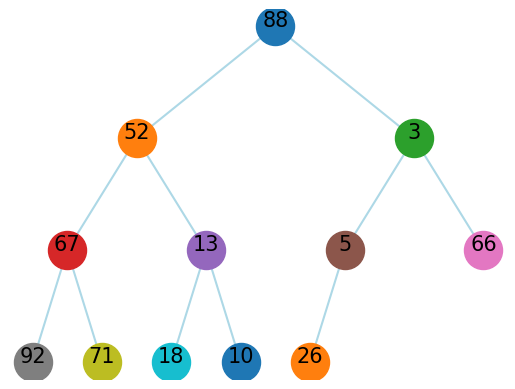

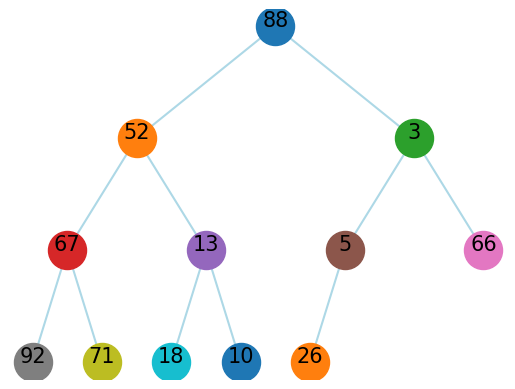

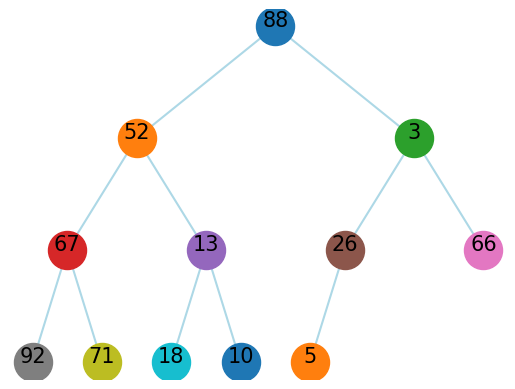

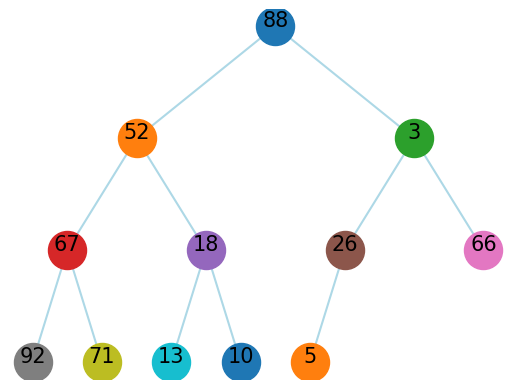

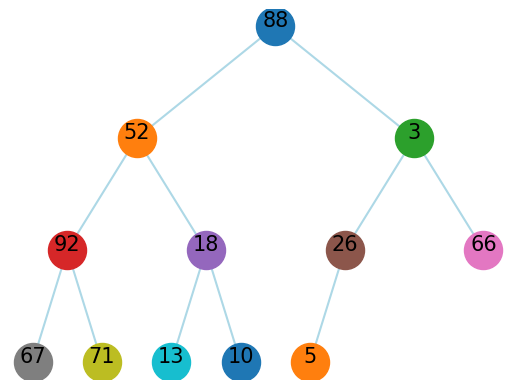

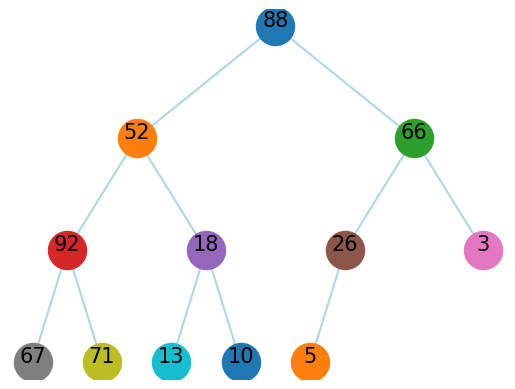

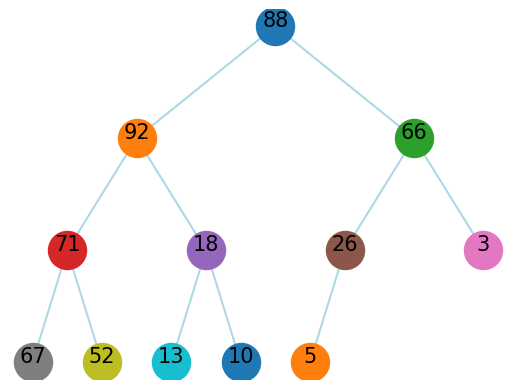

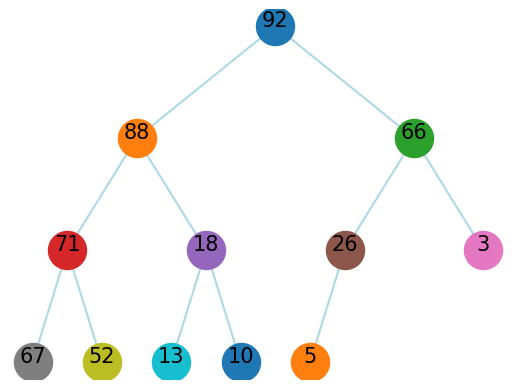

In [220]:
build_max_heap(nums2, viz = True)